<a href="https://colab.research.google.com/github/vignesh2718/Bike-Sales-Analysis/blob/main/DVPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Sales Data Analysis**

---


 **DATA VISUALIZATION**










In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv


In [88]:
data = pd.read_csv('sales.csv')
data.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [89]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [90]:
sd=data.drop(['Tax 5%'],axis=1)
sd.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [91]:
sales=sd.drop(['cogs'],axis=1)
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time',
       'Payment', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [92]:
sales['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [93]:
sales['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [94]:
sales['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [95]:
sales.groupby(['City','Gender']).count()

Invoice ID  Branch  Customer type  Product line  Unit price  \
City      Gender                                                                
Mandalay  Female         162     162            162           162         162   
          Male           170     170            170           170         170   
Naypyitaw Female         178     178            178           178         178   
          Male           150     150            150           150         150   
Yangon    Female         161     161            161           161         161   
          Male           179     179            179           179         179   

                  Quantity  Total  Date  Time  Payment  \
City      Gender                                         
Mandalay  Female       162    162   162   162      162   
          Male         170    170   170   170      170   
Naypyitaw Female       178    178   178   178      178   
          Male         150    150   150   150      150   
Yangon    Female       161    161   161   161      161   
          Male         179    179   179   179      179   

                  gross margin percentage  gross income  Rating  
City      Gender                                                 
Mandalay  Female                      162           162     162  
          Male                        170           170     170  
Naypyitaw Female                      178           178     178  
          Male                        150           150     150  
Yangon    Female                      161           161     161  
          Male                        179           179     179

In [96]:
shoppers=sales.groupby(['Gender','City']).count()['Customer type']
print(shoppers)

Gender  City     
Female  Mandalay     162
        Naypyitaw    178
        Yangon       161
Male    Mandalay     170
        Naypyitaw    150
        Yangon       179
Name: Customer type, dtype: int64


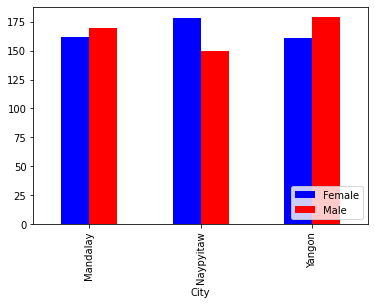

In [177]:
shoppers.unstack(level=0).plot(kind='bar', color=['blue','red'])
plt.legend(loc='lower right')

In [98]:
# Spender Men or Women
sales.groupby('Gender').sum()

,Unit price,Quantity,Total,gross margin percentage,gross income,Rating
Gender,,,,,,
Female,27687.24,2869,167882.925,2385.714286,7994.425,3489.2
Male,27984.89,2641,155083.824,2376.190476,7384.944,3483.5


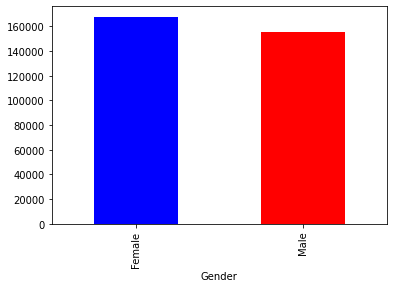

In [159]:
spend = sales.groupby('Gender').sum()['Total']
spend.plot(kind='bar', color=['blue','red'])

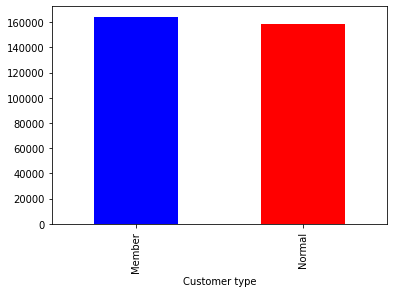

In [160]:
# which  customer spends more
sales.groupby('Customer type').sum()['Total']
member=sales.groupby('Customer type').sum()['Total']
member.plot(kind='bar',color=['blue','red'])

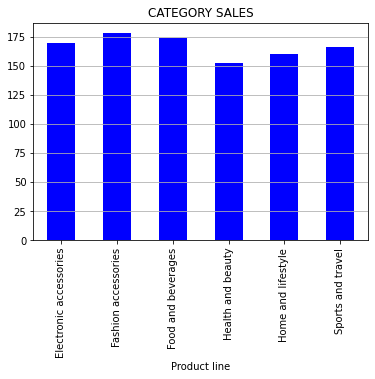

In [176]:
# which category solds more
category = sales.groupby('Product line').count()['Invoice ID']
plt.title('CATEGORY SALES')
category.plot(kind='bar',color=['blue'])
plt.grid(axis='y')

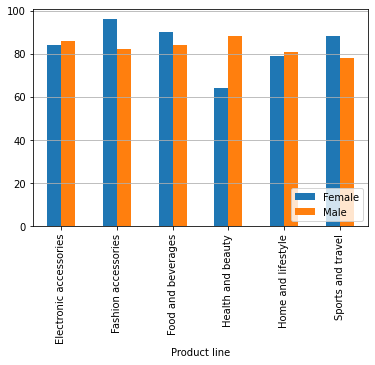

In [102]:
# product which has strong buy
sales.groupby(['Gender','Product line']).count()['Invoice ID']
sales_gender=sales.groupby(['Gender','Product line']).count()['Invoice ID']
sales_gender.unstack(level=0).plot(kind='bar',color=['blue','red'])
plt.legend(loc='lower right')
plt.grid(axis='y')

In [103]:
#  day of the month goes more sales
sales['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [113]:
pd.to_datetime(sales['Date']).dt.day
pd.to_datetime(sales['Date']).dt.month
sales['Day']=pd.to_datetime(sales['Date']).dt.day
sales['Month']=pd.to_datetime(sales['Date']).dt.month
sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,gross margin percentage,gross income,Rating,Day,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,4.761905,26.1415,9.1,5,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,4.761905,3.8200,9.6,8,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,4.761905,16.2155,7.4,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,4.761905,23.2880,8.4,27,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,4.761905,30.2085,5.3,8,2,10
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,627.6165,3/25/2019,18:30,Ewallet,4.761905,29.8865,4.1,25,3,18
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,433.6920,2/25/2019,14:36,Ewallet,4.761905,20.6520,5.8,25,2,14
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,772.3800,2/24/2019,11:38,Ewallet,4.761905,36.7800,8.0,24,2,11
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,76.1460,1/10/2019,17:15,Credit card,4.761905,3.6260,7.2,10,1,17
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,172.7460,2/20/2019,13:27,Credit card,4.761905,8.2260,5.9,20,2,13


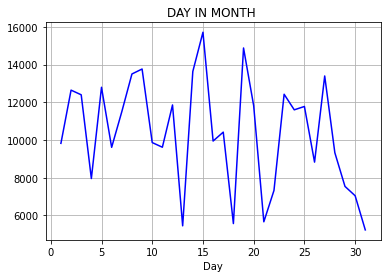

In [162]:
sales.groupby('Day').sum()['Total']
days=sales.groupby('Day').sum()['Total']
plt.title('DAY IN MONTH ')
days.plot(kind= 'line',color=['blue'])
plt.grid()

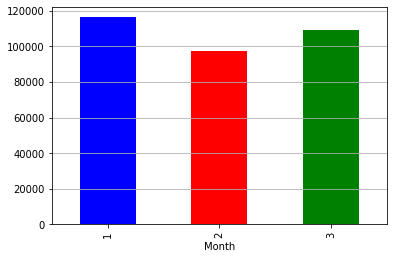

In [174]:
sales.groupby('Month').sum()['Total']
month=sales.groupby('Month').sum()['Total']
month.plot(kind='bar',color=['blue','red','green'])
plt.grid(axis='y')

In [119]:
# hours more sales occurs
sales['Time']
pd.to_datetime(sales['Time'])
sales['Hour']=pd.to_datetime(sales['Time']).dt.hour
sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,gross margin percentage,gross income,Rating,Day,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,4.761905,26.1415,9.1,5,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,4.761905,3.8200,9.6,8,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,4.761905,16.2155,7.4,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,4.761905,23.2880,8.4,27,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,4.761905,30.2085,5.3,8,2,10
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,627.6165,3/25/2019,18:30,Ewallet,4.761905,29.8865,4.1,25,3,18
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,433.6920,2/25/2019,14:36,Ewallet,4.761905,20.6520,5.8,25,2,14
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,772.3800,2/24/2019,11:38,Ewallet,4.761905,36.7800,8.0,24,2,11
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,76.1460,1/10/2019,17:15,Credit card,4.761905,3.6260,7.2,10,1,17
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,172.7460,2/20/2019,13:27,Credit card,4.761905,8.2260,5.9,20,2,13


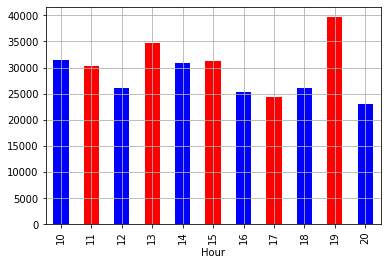

In [166]:
sales.groupby('Hour').sum()['Total'].plot(kind='bar',color=['blue','red'])
plt.grid()

In [132]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time',
       'Payment', 'gross margin percentage', 'gross income', 'Rating', 'Day',
       'Month', 'Hour'],
      dtype='object')

In [133]:
# payment methos mostly used 
sales['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

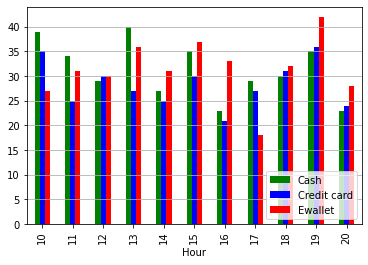

In [169]:
sales.groupby(['Payment','Hour']).count()['Customer type'].unstack(level=0).plot(kind='bar',color=['green','blue','red'])
plt.grid(axis='y')
plt.legend(loc='lower right')

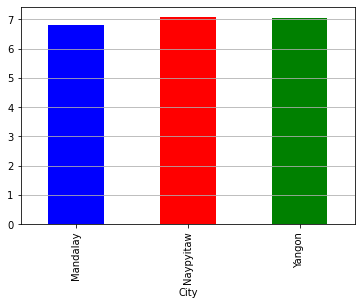

In [173]:
# which city store has best rating
rating = sales.groupby('City').mean()['Rating']
rating.plot(kind='bar',color=['blue','red','green'])
plt.grid(axis='y')

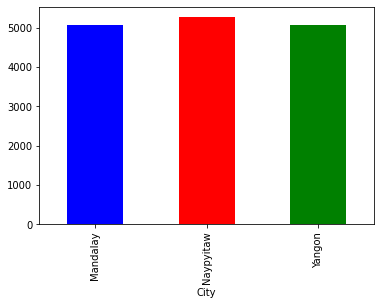

In [172]:
# highest gross income as per city
income = sales.groupby('City').sum()['gross income']
income.plot(kind='bar', color=['blue','red','green'])